# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
%matplotlib inline
#matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from tqdm import tqdm_gui
import tqdm.notebook as tq

In [0]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

<h2>3.1. Distribution of malware classes in whole data set </h2>

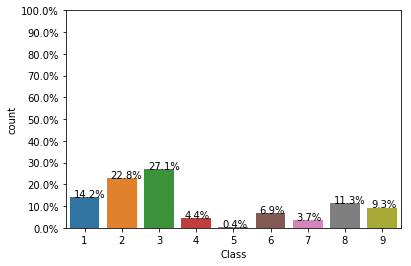

In [48]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [3]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

   Class                    ID      size
0      3  CYktVyrlT8B3EODuSRQx  8.941406
1      1  CQS2WYL4Oq1MpZnNfJU8  0.855469
2      2  CT9nz5AgFyHGskIN8Oaj  7.195312
3      3  e9aloKnLSh8JGDjQ2B0T  6.703125
4      3  GxcE1XCeU35zwFIy0ALN  8.941406


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


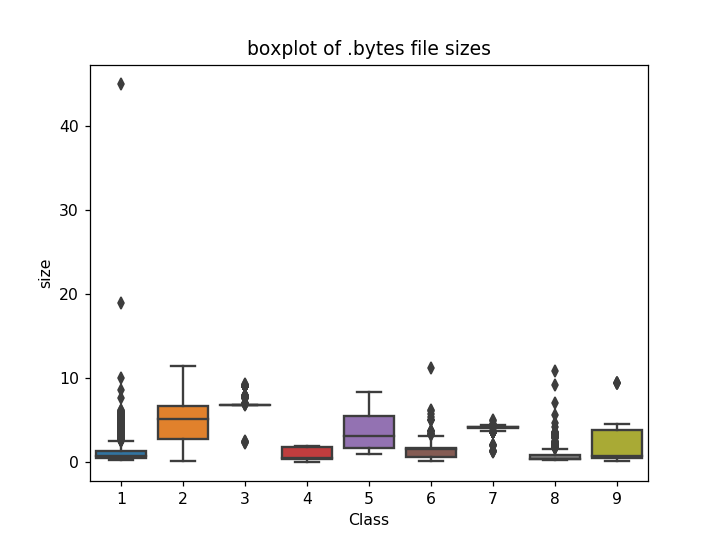

In [0]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [4]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files1 = os.listdir('byteFiles')
files = files1
filenames=[]
array=[]
for file in tq.tqdm(files):
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()


In [8]:
#Creating a dictionary and storing all the bi-grams
bigrams_dict={}
#files = os.listdir('byteFiles')
files = files1

for file in tq.tqdm(files):
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_file:
            for lines in byte_file:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    if line[idx]+line[idx+1] in bigrams_dict.keys(): #Check for bi-grams
                        pass
                    else:
                        bigrams_dict[line[idx]+line[idx+1]]=0 #Storing the bi_grams as keys in a dict 
        byte_file.close()

In [9]:
bigrams=[] #List of all the bigrams
for i in bigrams_dict.keys():
    bigrams.append(i)

In [10]:
features= np.zeros((0,len(bigrams)),dtype=int) #Creating an empty datapoint with all the bigrams as features
bigrams_df = pd.DataFrame(data=features,columns=bigrams) #Creating a dataframe with the columns as the bi-grams
#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is bi-grams bag of words
k = 0
filenames2 = []
#files1 = os.listdir('byteFiles')
files = files1[:1000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1 #Counting the bi-grams
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)           
    byte_flie.close()

In [11]:
files = files1[1000:2000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [12]:
files = files1[2000:3000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [13]:
files = files1[3000:4000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [14]:
files = files1[4000:5000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [15]:
files = files1[5000:6000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [16]:
files = files1[6000:7000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [17]:
files = files1[7000:8000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [18]:
files = files1[8000:9000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [19]:
files = files1[9000:10000]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


In [20]:
files = files1[10000:]

for file in tq.tqdm(files):
    filenames2.append(file)
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            bigrams_d = {}
            for i in bigrams:
                bigrams_d[i]=0
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for idx in range(len(line)-1):
                    bigrams_d[line[idx]+line[idx+1]]+=1
    bigrams_df = bigrams_df.append(bigrams_d,ignore_index=True)
                
    byte_flie.close()


1. I have divided the preparation of bow of bi-grams into multiple parts, each part processing a chunk of multiple files as it helped to speed up the process

In [21]:
bigrams_df.shape

(10868, 65775)

In [22]:
bigrams_df.insert(0,"ID",filenames2)

In [23]:
byte_features = bigrams_df

In [24]:
#byte_features.drop(['Unnamed: 0'],axis=1,inplace=True)
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

,ID,618C,FED4,0BDE,7EC6,C39D,028C,B49C,890E,8CFA,...,FBBE,5699,1011,AAA4,5906,7C3E,B888,68D4,69D5,64A6
0,CYktVyrlT8B3EODuSRQx,14,9,10,13,3,8,9,15,11,...,11,8,12,18,10,6,12,13,10,12
1,CQS2WYL4Oq1MpZnNfJU8,0,0,2,1,2,0,2,10,0,...,0,2,6,1,0,3,12,5,3,3


In [25]:
byte_features_with_size_bi = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size_bi.to_csv("result_with_size_bigrams.csv") #Storing it in a csv file as it takes a lot of time to process the bow
byte_features_with_size_bi.head(2)

,ID,618C,FED4,0BDE,7EC6,C39D,028C,B49C,890E,8CFA,...,1011,AAA4,5906,7C3E,B888,68D4,69D5,64A6,Class,size
0,CYktVyrlT8B3EODuSRQx,14,9,10,13,3,8,9,15,11,...,12,18,10,6,12,13,10,12,3,8.941406
1,CQS2WYL4Oq1MpZnNfJU8,0,0,2,1,2,0,2,10,0,...,6,1,0,3,12,5,3,3,1,0.855469


In [0]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [0]:
byte_features=pd.read_csv("result.csv") #Reading the data with the bow of unigrams
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f7,f8,f9,fa,fb,fc,fd,fe,ff,??
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,2804,3687,3101,3211,3097,2758,3099,2759,5753,1824
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,451,6536,439,281,302,7639,518,17001,54902,8588


In [0]:
data_size_byte.head(2)

,ID,size,Class
0,01azqd4InC7m9JpocGv5,4.234863,9
1,01IsoiSMh5gxyDYTl4CB,5.538818,2


In [0]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,5.538818,2


In [6]:
byte_features_with_size_bi.drop(['Unnamed: 0'],axis=1,inplace=True)
byte_features_with_size_bi.head(2)

,ID,618C,FED4,0BDE,7EC6,C39D,028C,B49C,890E,8CFA,...,1011,AAA4,5906,7C3E,B888,68D4,69D5,64A6,Class,size
0,CYktVyrlT8B3EODuSRQx,14,9,10,13,3,8,9,15,11,...,12,18,10,6,12,13,10,12,3,8.941406
1,CQS2WYL4Oq1MpZnNfJU8,0,0,2,1,2,0,2,10,0,...,6,1,0,3,12,5,3,3,1,0.855469


In [3]:
#Loading the uni-grams data with size features
byte_features_uni = pd.read_csv('result_with_size.csv')

In [4]:
#Loading the bi-grams data with size features
byte_features_with_size_bi = pd.read_csv('result_with_size_bigrams.csv')

In [5]:
byte_features_uni.drop(['Unnamed: 0','??','size','Class'],axis=1,inplace=True)
byte_features_uni.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3271,2804,3687,3101,3211,3097,2758,3099,2759,5753
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,290,451,6536,439,281,302,7639,518,17001,54902


In [6]:
#Merging the bi-grams and uni-grams features
byte_features_with_size = byte_features_with_size_bi.merge(byte_features_uni, on='ID')
byte_features_with_size.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
print(byte_features_with_size.shape)
byte_features_with_size.head(2)

(10868, 66034)


,ID,618C,FED4,0BDE,7EC6,C39D,028C,B49C,890E,8CFA,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
0,CYktVyrlT8B3EODuSRQx,14,9,10,13,3,8,9,15,11,...,3096,3086,3059,2955,3015,3054,3102,3080,3072,5105
1,CQS2WYL4Oq1MpZnNfJU8,0,0,2,1,2,0,2,10,0,...,636,524,936,462,334,617,1669,388,973,12787


In [8]:
data_y = byte_features_with_size['Class']

In [26]:
from sklearn.preprocessing import Normalizer
#Normalizing the data with l1 regularization
result = Normalizer(norm='l1').fit_transform(byte_features_with_size.drop(['ID','Class'], axis=1))

In [27]:
result.shape

(10868, 66032)

In [14]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
#result = normalize(byte_features_with_size)

In [36]:
#Implementing PCA to reduce the dimentionality 
from sklearn.decomposition import PCA
pca = PCA(n_components=min(result.shape[0], 5000))
pca.fit(result)

PCA(copy=True, iterated_power='auto', n_components=5000, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [37]:
result1 = pca.transform(result)

In [38]:
result1.shape

(10868, 5000)

In [39]:
#Converting the final dense matrix to sparse matrix
from scipy import sparse
result1 = sparse.csr_matrix(result1)

1. In the above steps for the ByteFiles, I have taken the uni-grams BOW, the bi-grams BOW and the size of the files as the features. 
2. After combining all the features, the final matrix is of size (10868, 66032), which is of huge dimention.
3. I have then used Normalization with l1 regularization to create sparsity so as all the un-useful features become 0 or close to 0.
4. After that to avoid curse of dimentionality, I have used PCA to reduce the dimention and consider the top 5000 features which keep the maximum information for the data modeling.

<h3>3.2.4 Multivariate Analysis </h3>

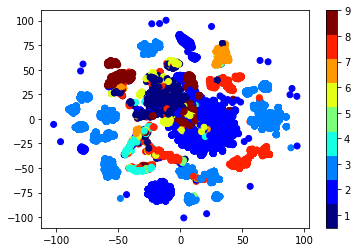

In [101]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
#results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
results=xtsne.fit_transform(result1)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

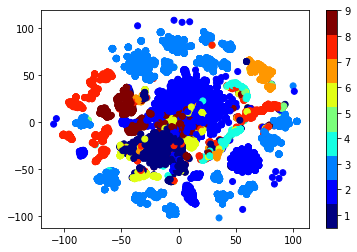

In [102]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
#results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
results=xtsne.fit_transform(result1)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [103]:
#data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
#X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
X_train, X_test, y_train, y_test = train_test_split(result1, data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [104]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


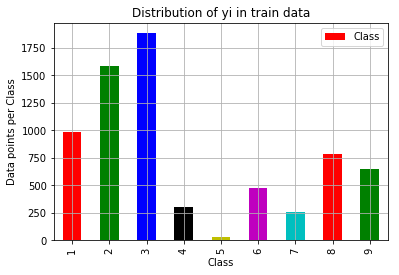

Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
Number of data points in class [1] : [[986]] ( [[14.177]] %)
--------------------------------------------------------------------------------


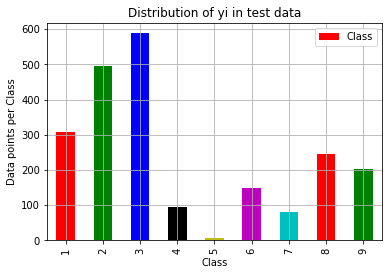

Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
Number of data points in class [1] : [[308]] ( [[14.167]] %)
--------------------------------------------------------------------------------


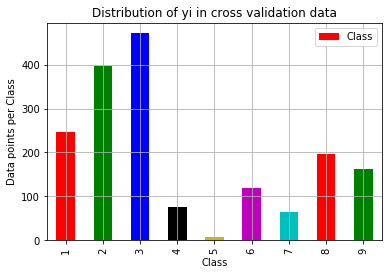

Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)
Number of data points in class [1] : [[247]] ( [[14.204]] %)


In [112]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = pd.DataFrame(y_train.value_counts()).sort_index()
test_class_distribution = pd.DataFrame(y_test.value_counts()).sort_index()
cv_class_distribution = pd.DataFrame(y_cv.value_counts()).sort_index()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [33]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show();

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show();
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show();
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files</h2>

<h3>4.1.1. Random Model</h3>

Log loss on Cross Validation Data using Random Model 2.481485082051519
Log loss on Test Data using Random Model 2.4791046560959384
Number of misclassified points  89.78840846366145
-------------------------------------------------- Confusion matrix --------------------------------------------------


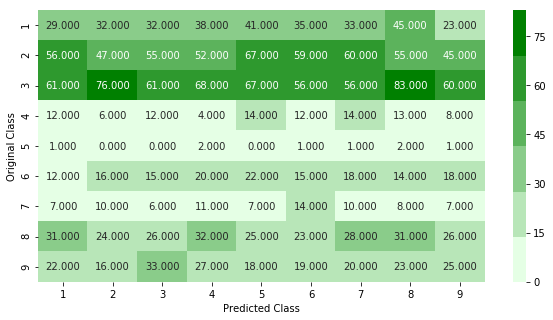

-------------------------------------------------- Precision matrix --------------------------------------------------


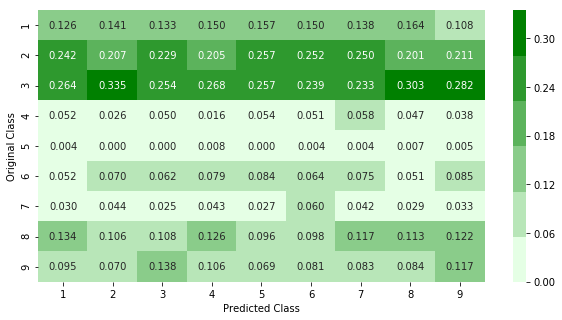

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


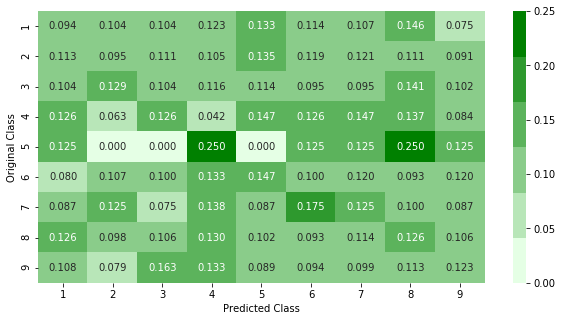

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [114]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

The random model has a log-loss of 2.47. So, our upper limit is 2.47. We have to keep our log-loss close to 0.

<h3>4.1.2. K Nearest Neighbour Classification</h3>


log_loss for k =  1 is 0.3038572049956251
log_loss for k =  3 is 0.2968261306305591
log_loss for k =  5 is 0.31634056399397364
log_loss for k =  7 is 0.3407757644418158
log_loss for k =  9 is 0.36143057795465444


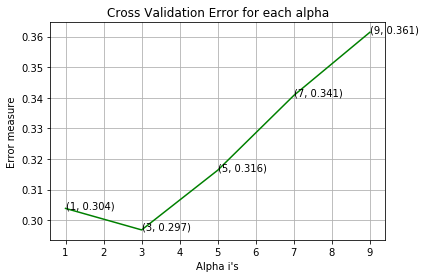

For values of best alpha =  3 The train log loss is: 0.14884676475349912
For values of best alpha =  3 The cross validation log loss is: 0.2968261306305591
For values of best alpha =  3 The test log loss is: 0.3267145865735649
Number of misclassified points  7.727690892364306
-------------------------------------------------- Confusion matrix --------------------------------------------------


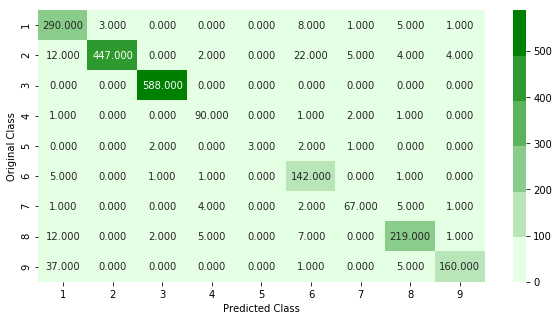

-------------------------------------------------- Precision matrix --------------------------------------------------


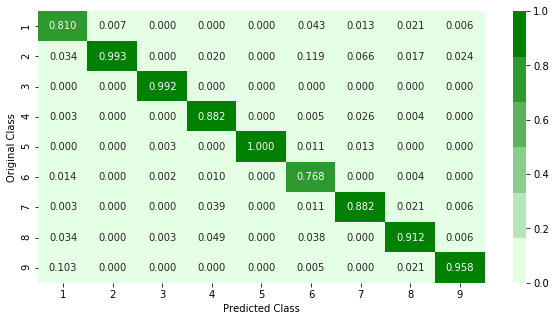

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


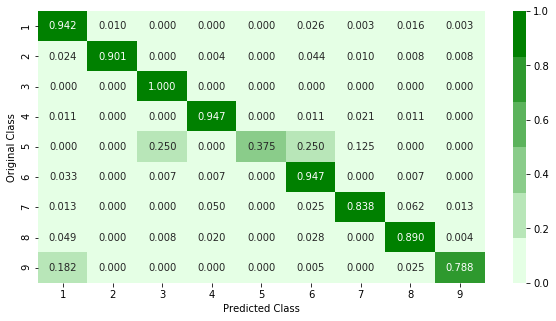

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [117]:
alpha = [x for x in range(1, 11, 2)]
cv_log_error_array=[]
for i in tq.tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha], n_jobs=-1)
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

The log-loss obtained by KNN is 0.3 on test data which is an excellent improvement over the Random Model

<h3>4.1.3. Logistic Regression</h3>


log_loss for c =  0.01 is 1.2667698015008806
log_loss for c =  0.1 is 1.1849201740739823
log_loss for c =  1 is 1.1069261021621415
log_loss for c =  10 is 0.9808139998053133
log_loss for c =  100 is 0.9048283346234127


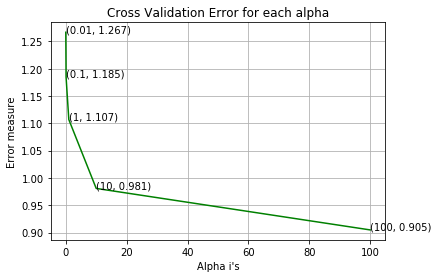

log loss for train data 0.8932002637043791
log loss for cv data 0.9048283346234127
log loss for test data 0.8877434649552818
Number of misclassified points  25.48298068077277
-------------------------------------------------- Confusion matrix --------------------------------------------------


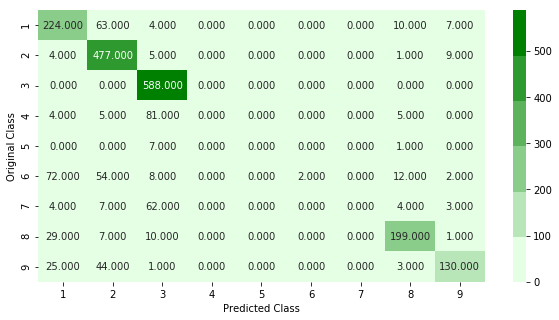

-------------------------------------------------- Precision matrix --------------------------------------------------


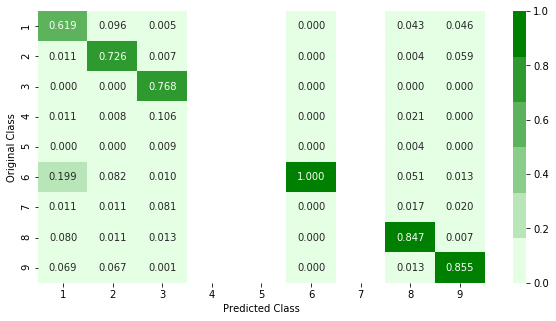

Sum of columns in precision matrix [ 1.  1.  1. nan nan  1. nan  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


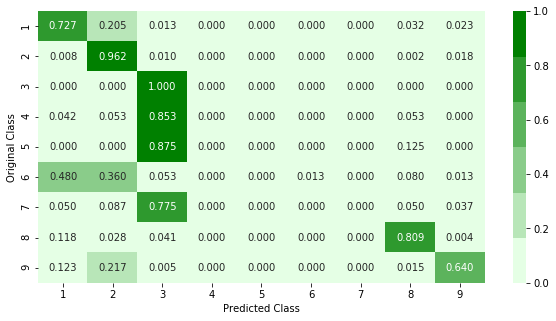

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [118]:
alpha = [10 ** x for x in range(-3, 3)]
cv_log_error_array=[]
for i in tq.tqdm(alpha):
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced', n_jobs=-1)
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced', n_jobs=-1)
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

1. Logistic Regression didnot perform as well as compared to KNN as we have a test log-loss of 0.87. 
2. Classes 4,5 and 7 had fewer number of points and Logistic Regression failed to classify them. It did a terrible job in this case.

<h3> 4.1.4. Random Forest Classifier </h3>


log_loss for c =  100 is 0.15306535066862256
log_loss for c =  500 is 0.14356458788943374
log_loss for c =  1000 is 0.1423218103602208
log_loss for c =  2000 is 0.14196129611601452


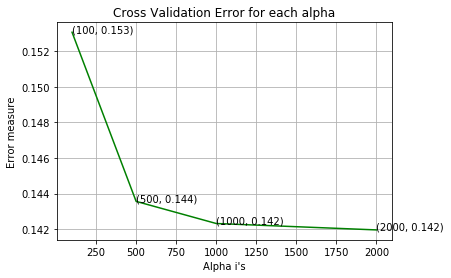

For values of best alpha =  2000 The train log loss is: 0.033079949350708425
For values of best alpha =  2000 The cross validation log loss is: 0.14196129611601452
For values of best alpha =  2000 The test log loss is: 0.1887339149162738
Number of misclassified points  4.461821527138914
-------------------------------------------------- Confusion matrix --------------------------------------------------


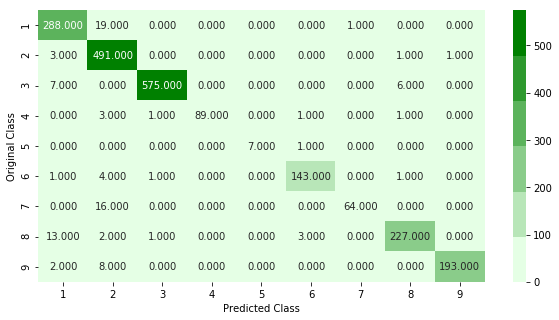

-------------------------------------------------- Precision matrix --------------------------------------------------


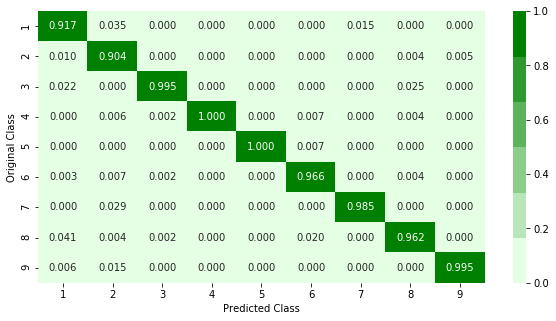

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


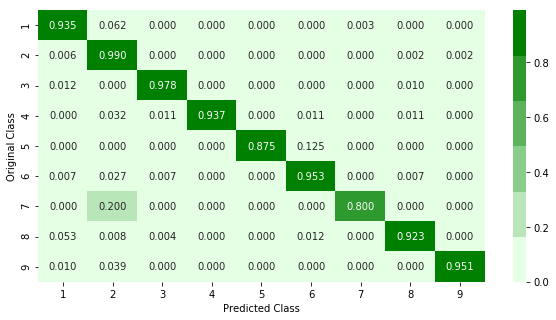

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [119]:
alpha=[100,500,1000,2000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in tq.tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

Random-Forest has performed better than KNN with a test loss of 0.16 and misclassification rate of 3.95

<h3> Preparing the Data for XgBoost </h3>

Since XgBoost is lot good with high dimentionality, I have reduced the features using the RF Classifier so as it make it work with XgBoost. This step is not necessary as I have already reduced the dimentionality using PCA but, I wanted to try it out as this was one of the approach taken by the Kaggle winner of this competition. If I had no computational and latency constraints, I would have skipped the PCA part and focussed only on dimentionality reduction using Random Forest Classifier to prepare the data for XgBoost. Since after 3.2.3.3.1 version of Sklearn, the transform mehtod of Random Forest Classifier has been removed. So, I decided to do it using feature imporatnace, as Random Forest is easy to interpretable in terms of feature importance.

In [120]:
xx = r_cfl.feature_importances_
x_idx = np.argsort(xx)[-500:]

In [121]:
X_train11 = X_train[:,[i for i in x_idx]]
X_test11 = X_test[:,[i for i in x_idx]]
X_cv11 = X_cv[:,[i for i in x_idx]]

In [122]:
print(X_train11.shape)
print(X_test11.shape)
print(X_cv11.shape)

(6955, 500)
(2174, 500)
(1739, 500)


<h3>4.1.5. XgBoost Classification</h3>

<h3>4.1.5. XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [ ]:
X_tr = X_train
X_cv1 = X_cv
X_te = X_test
y_tr = y_train
y_cv1 = y_cv
y_te = y_test

In [123]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.2],
     'n_estimators':[100,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.5,1],
    'subsample':[0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train11,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   57.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 13.1min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 33.7min
[Parallel(n_jobs=-1)]: Done  41 out of  50 | elapsed: 42.9min remaining:  9.4min
[Parallel(n_jobs=-1)]: Done  47 out of  50 | elapsed: 60.0min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 62.4min finished


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_it

In [124]:
print (random_cfl1.best_params_)

{'colsample_bytree': 0.5, 'subsample': 1, 'learning_rate': 0.05, 'n_estimators': 1000, 'max_depth': 5}


train loss 0.02557659889306297
cv loss 0.07946323624340922
test loss 0.10142902463891106
Number of misclassified points  2.2539098436062557
-------------------------------------------------- Confusion matrix --------------------------------------------------


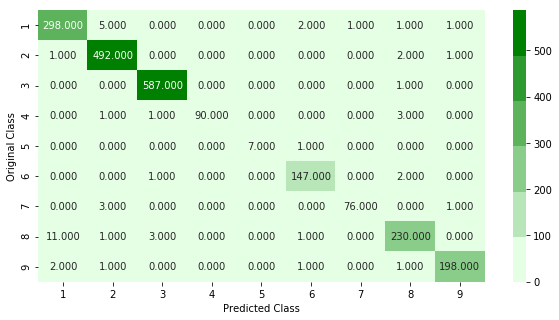

-------------------------------------------------- Precision matrix --------------------------------------------------


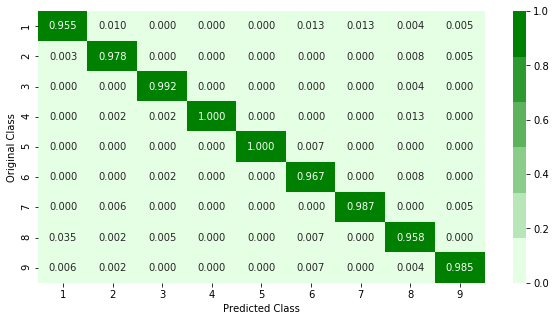

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


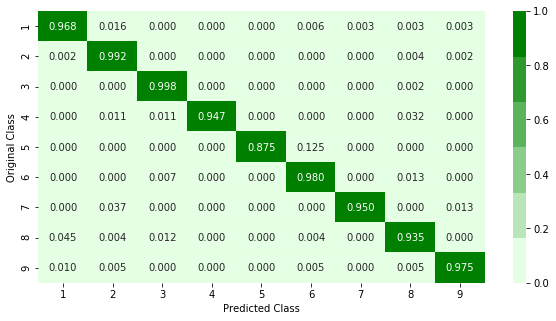

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [143]:
x_cfl=XGBClassifier(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, max_depth=5)
x_cfl.fit(X_train11,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train11,y_train)

predict_y = c_cfl.predict_proba(X_train11)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv11)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test11)
print ('test loss',log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, c_cfl.predict(X_test11))

<h2> 4.2 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.2.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [0]:
#intially create five folders
#first 
#second
#thrid
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'thrid')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [0]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('thrid')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('thrid/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

# Image Based Features:

In [44]:
#https://www.youtube.com/watch?v=VLQTRlLGz5Y
import array
images_features= pd.DataFrame(columns=range(0,800))
source='asmFiles/'
files_asm = os.listdir('asmFiles')
images_features[0] = range(10868)

for i in tq.tqdm(range(0,10868)):
    file = open(source+files_asm[i],'rb')#opening the file in byte format
    ln = os.path.getsize(source+files_asm[i]) 
    width = 256
    rem = int(ln%width)
    a = array.array("B") # uint8 array
    a.fromfile(file,ln-rem)#reading 2560 pixels
    a = a[:800] #taking first 800 pixel intensity as it is most useful
    val = np.uint8(a) #Storing in the form of unsigned integer for Binary representation 
    images_features.iloc[i]=val
    file.close()

The above feature is an implemention of the winner team of this Kaggle problem. Here we are reading the asm file as a binary file. Using this we can generate an Image of the asm files. The first 800 pixels of the image were most useful as found out by cross-validation. So, we are going to use the first 800 pixels as features for the ASM files. 

In [45]:
images_features.shape

(10868, 800)

In [46]:
filenames_asm = []
for files in filesasm:
    filenames_asm.append(files)

In [47]:
images_features.insert(0,"ID",filenames_asm)

In [48]:
images_features.to_csv('image_features_asm')

In [9]:
images_features = pd.read_csv('image_features_asm')

In [10]:
images_features['ID'] = images_features['ID'].str.split('.').str[0]
images_features.drop(['Unnamed: 0'],axis=1,inplace=True)
images_features.head(2)

,ID,0,1,2,3,4,5,6,7,8,...,790,791,792,793,794,795,796,797,798,799
0,9lHv4AnrzgeWNGcCsEfa,72,69,65,68,69,82,58,49,48,...,109,111,100,101,108,32,102,108,97,116
1,8Ut0v1SIg753ERpTGoma,46,116,101,120,116,58,48,48,52,...,56,54,32,40,80,69,41,13,10,46


In [11]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,edx,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,18,66,15,43,83,0,17,48,29,1
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,18,29,48,82,12,0,14,0,20,1
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,13,42,10,67,14,0,11,0,9,1
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,6,8,14,7,2,0,8,0,6,1
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,12,9,18,29,5,0,11,0,11,1


<h4> 4.2.1.1 Files sizes of each .asm file </h4>

In [17]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

   Class                    ID       size
0      1  9lHv4AnrzgeWNGcCsEfa   4.488660
1      2  8Ut0v1SIg753ERpTGoma  36.681548
2      7  e4TZIcugCDM50yiKWjkF   0.169212
3      3  a6IgMRoGcifP5zTUyrqC   0.169220
4      1  1smUAv6epFKI7kbR3u0G   2.010050


<h4> 4.2.1.2 Distribution of .asm file sizes</h4>

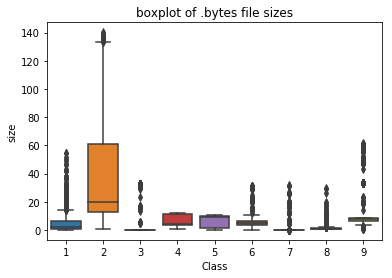

In [56]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size", data=asm_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [18]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_byte.shape)
result_asm = pd.merge(result_asm, asm_size_byte.drop(['Class'], axis=1),on='ID', how='left')
result_asm.head()

(10868, 53)
(10868, 3)


,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,esi,eax,ebx,ecx,edi,ebp,esp,eip,Class,size
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,66,15,43,83,0,17,48,29,1,0.078190
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,29,48,82,12,0,14,0,20,1,0.063400
2,3ekVow2ajZHbTnBcsDfX,17,427,0,50,43,0,145,0,3,...,42,10,67,14,0,11,0,9,1,0.041695
3,3X2nY7iQaPBIWDrAZqJe,17,227,0,43,19,0,0,0,3,...,8,14,7,2,0,8,0,6,1,0.018757
4,46OZzdsSKDCFV8h7XWxf,17,402,0,59,170,0,0,0,3,...,9,18,29,5,0,11,0,11,1,0.037567


In [12]:
result_asm_df = result_asm.merge(images_features, on='ID')

In [13]:
result_asm_df.shape

(10868, 853)

In [14]:
asm_y = result_asm_df['Class']

In [125]:
from sklearn.preprocessing import Normalizer

asm_x = Normalizer(norm='l1').fit_transform(result_asm_df.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1))

In [126]:
from scipy import sparse
asm_x = sparse.csr_matrix(asm_x)

<h3> 4.2.2 Univariate analysis on  asm file features</h3>

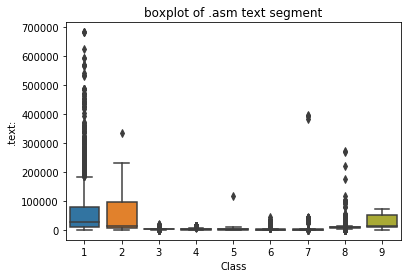

In [127]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm_df)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

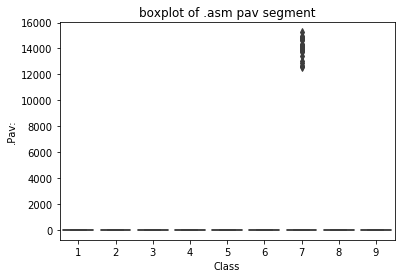

In [128]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm_df)
plt.title("boxplot of .asm pav segment")
plt.show()

The plot for pav segment is not interpretable hence, it is not a useful feature

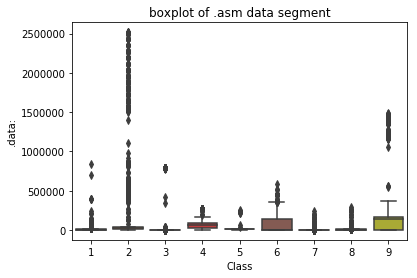

In [129]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm_df)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

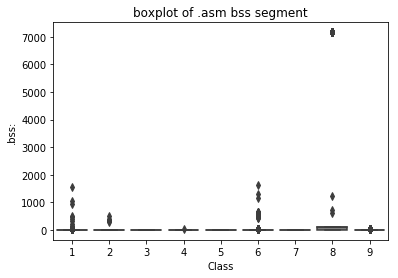

In [130]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm_df)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

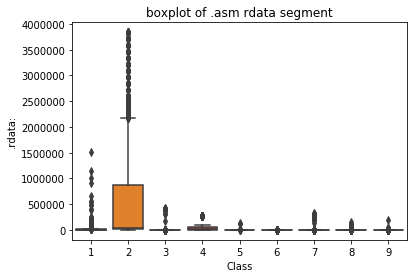

In [131]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm_df)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

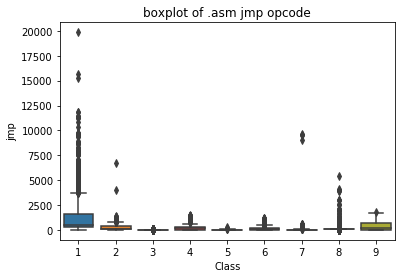

In [132]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm_df)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

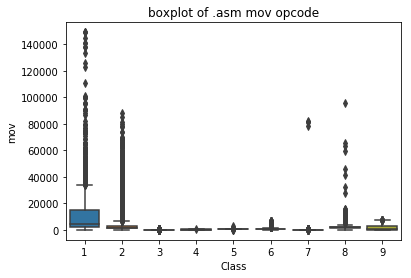

In [133]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm_df)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

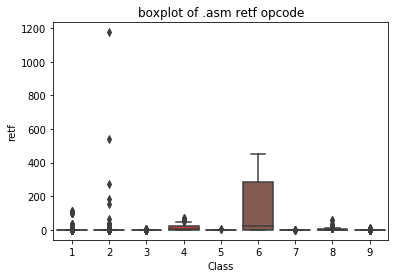

In [134]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm_df)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

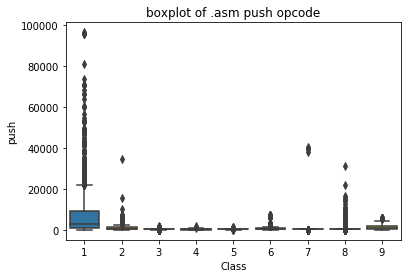

In [135]:
ax = sns.boxplot(x="Class", y="push", data=result_asm_df)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.2.2 Multivariate Analysis on .asm file features </h3>

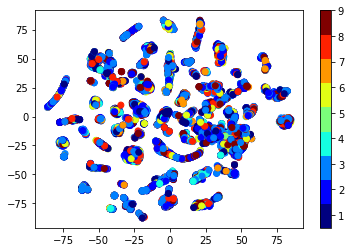

In [136]:

#multivariate analysis on asm files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
#results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
results=xtsne.fit_transform(asm_x)
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

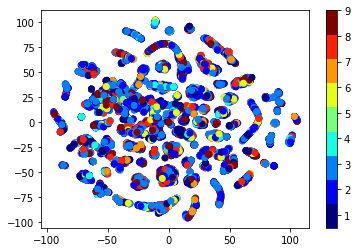

In [137]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(asm_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

<h3> 4.2.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.3 Train and test split</h2>

In [144]:
asm_y = result_asm_df['Class']
#asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [145]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [146]:
print(X_train_asm.shape)
print(X_cv_asm.shape)
print(X_test_asm.shape)

(6955, 849)
(1739, 849)
(2174, 849)


<h2> 4.4. Machine Learning models on features of .asm files</h2>

<h3> 4.4.1 K-Nearest Neigbors </h3>


log_loss for k =  1 is 0.112471898301456
log_loss for k =  3 is 0.11361609068634819
log_loss for k =  5 is 0.12749243808002594
log_loss for k =  7 is 0.14465500322551503
log_loss for k =  9 is 0.16065176641789602
log_loss for k =  11 is 0.1711986888610764


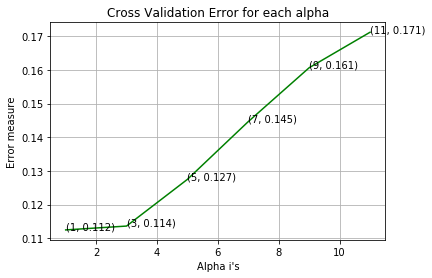

log loss for train data 0.03710798270806476
log loss for cv data 0.112471898301456
log loss for test data 0.12188805349569316
Number of misclassified points  2.02391904323827
-------------------------------------------------- Confusion matrix --------------------------------------------------


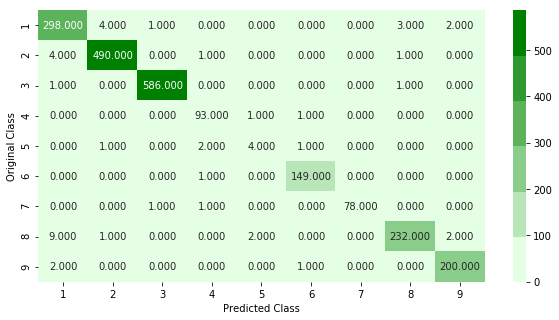

-------------------------------------------------- Precision matrix --------------------------------------------------


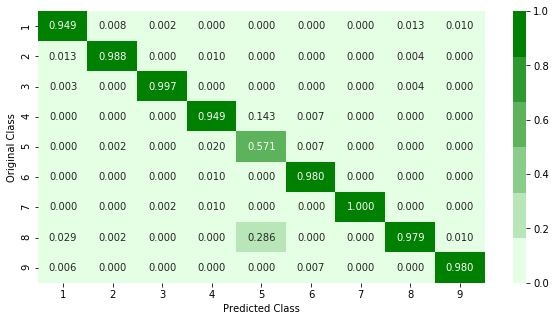

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


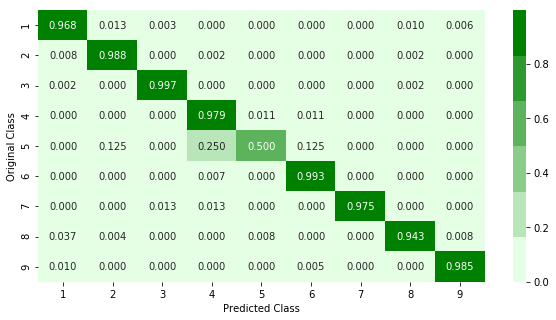

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [147]:
alpha = [x for x in range(1, 13,2)]
cv_log_error_array=[]
for i in tq.tqdm(alpha):
    k_cfl=KNeighborsClassifier(n_neighbors=i, n_jobs = -1)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha],n_jobs = -1)
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

K-NN did an excellent job in classifying the asm files with a test score of only 0.121. However, it didn't do an excellent for for Class 5, which is very much less in quantity.

<h3> 4.4.2 Logistic Regression </h3>


log_loss for c =  0.001 is 1.5334596289025968
log_loss for c =  0.01 is 1.4880747889973451
log_loss for c =  0.1 is 1.3508447983856642
log_loss for c =  1 is 1.2307496825136084
log_loss for c =  10 is 1.1385962777701197
log_loss for c =  100 is 1.1735227856798687
log_loss for c =  1000 is 1.2728754624318437
log_loss for c =  10000 is 1.236533514329243


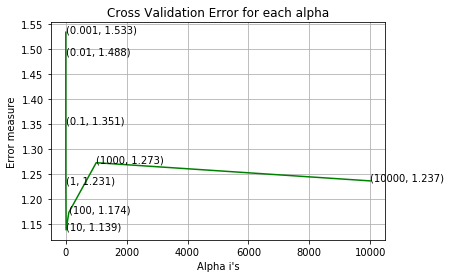

log loss for train data 1.1412143720218657
log loss for cv data 1.1385962777701197
log loss for test data 1.1462439216116331
Number of misclassified points  30.63477460901564
-------------------------------------------------- Confusion matrix --------------------------------------------------


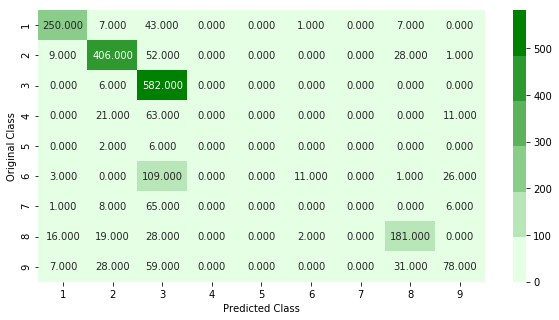

-------------------------------------------------- Precision matrix --------------------------------------------------


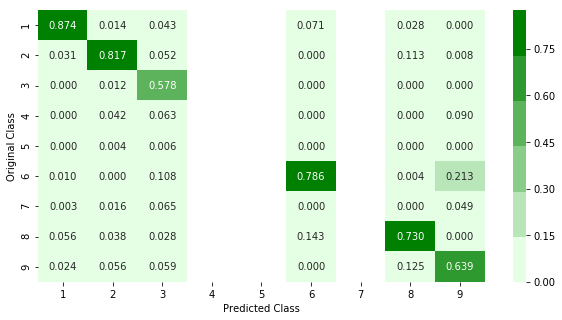

Sum of columns in precision matrix [ 1.  1.  1. nan nan  1. nan  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


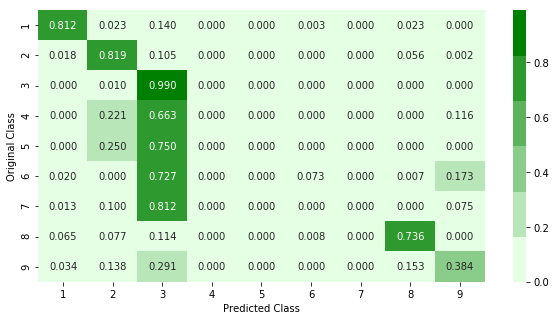

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [148]:
alpha = [10 ** x for x in range(-3, 5)]
cv_log_error_array=[]
for i in tq.tqdm(alpha):
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced', n_jobs=-1)
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced', n_jobs=-1)
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

Logistic Regression did a terrible job with a very high loss of 1.46 and 30% misclassification rate. It could not classify 5,6 and 7 at all, which are less in numbers.

<h3> 4.4.3 Random Forest Classifier</h3>


log_loss for c =  500 is 0.024754840375851867
log_loss for c =  1000 is 0.024997582601756597
log_loss for c =  2000 is 0.025154991867529654
log_loss for c =  3000 is 0.025226289744368705


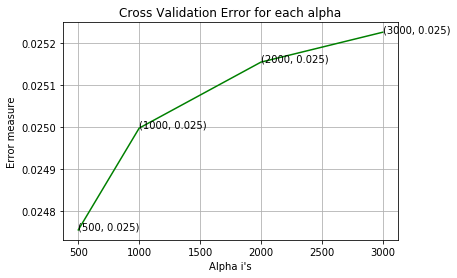

log loss for train data 0.015478679677367463
log loss for cv data 0.024754840375851867
log loss for test data 0.03526606644553298
Number of misclassified points  0.5519779208831647
-------------------------------------------------- Confusion matrix --------------------------------------------------


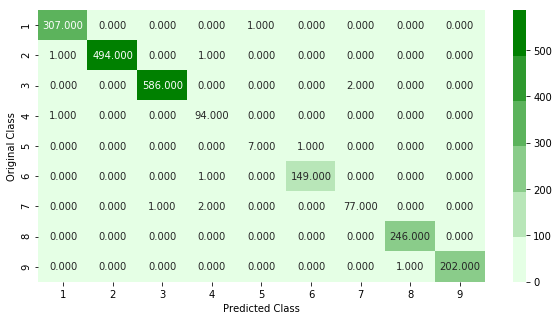

-------------------------------------------------- Precision matrix --------------------------------------------------


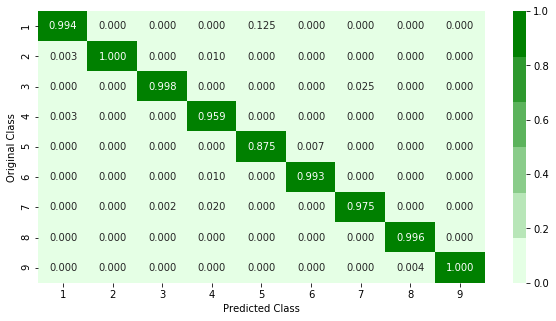

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


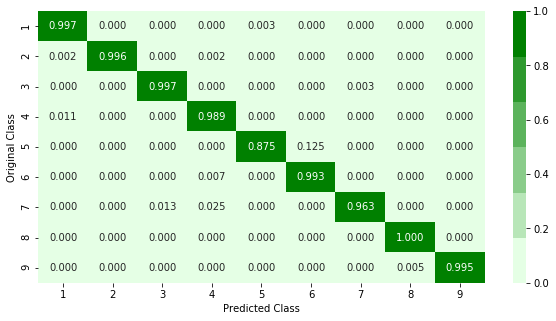

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [149]:
alpha=[500,1000,2000,3000]
cv_log_error_array=[]
for i in tq.tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

Random Forest did an excellent job in classification with a test log-loss of 0.035 and a misclassification rate of 0.5519.

<h3> 4.4.4 XgBoost Classifier</h3>

<h3> 4.4.5 Xgboost Classifier with best hyperparameters</h3>

In [151]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.01,0.05,0.1,0.2],
     'n_estimators':[500,1000,2000],
     'max_depth':[3,5],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.2,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,cv=3,verbose=10,n_jobs=-1,)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 27.3min remaining: 15.8min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 33.2min remaining: 10.1min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 49.8min remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 60.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [152]:
print(random_cfl.best_params_)

{'colsample_bytree': 0.5, 'subsample': 1, 'learning_rate': 0.1, 'n_estimators': 500, 'max_depth': 5}


train loss 0.013002669978183782
cv loss 0.01837331101040799
test loss 0.03110931967263176
Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


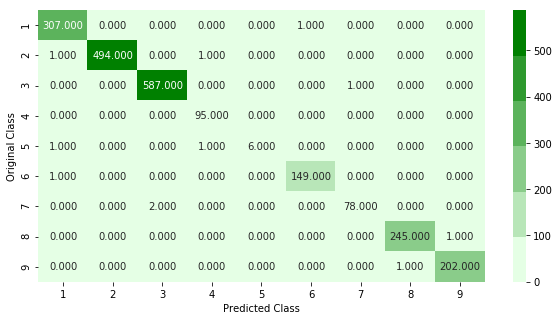

-------------------------------------------------- Precision matrix --------------------------------------------------


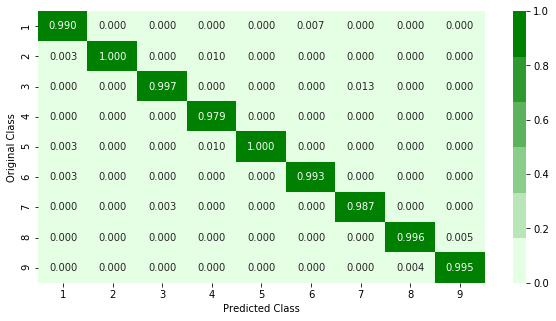

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


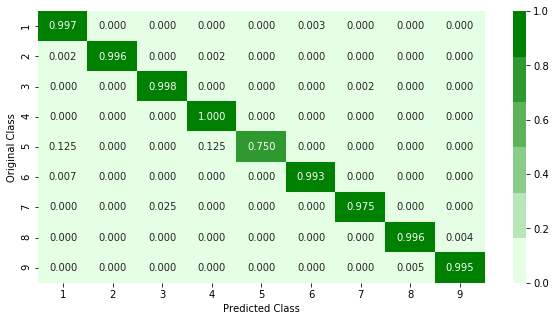

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [153]:
x_cfl=XGBClassifier(n_estimators=500,subsample=1,learning_rate=0.1,colsample_bytree=0.5,max_depth=5, nthread=-1)
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm, c_cfl.predict(X_test_asm))

GBDT has very small improvement over Random Forest with 0.0311 as test log-loss and 0.505 misclassification rate.  

<h2> 4.5. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.5.1. Merging both asm and byte file features</h3>

In [15]:
byte_features_with_size.head(2)

,ID,618C,FED4,0BDE,7EC6,C39D,028C,B49C,890E,8CFA,...,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff
0,CYktVyrlT8B3EODuSRQx,14,9,10,13,3,8,9,15,11,...,3096,3086,3059,2955,3015,3054,3102,3080,3072,5105
1,CQS2WYL4Oq1MpZnNfJU8,0,0,2,1,2,0,2,10,0,...,636,524,936,462,334,617,1669,388,973,12787


In [16]:
result_asm_df.head(2)

,ID,HEADER:,.text:,.Pav:,.idata:,.data:,.bss:,.rdata:,.edata:,.rsrc:,...,790,791,792,793,794,795,796,797,798,799
0,01kcPWA9K2BOxQeS5Rju,19,744,0,127,57,0,323,0,3,...,109,111,100,101,108,32,102,108,97,116
1,1E93CpP60RHFNiT5Qfvn,17,838,0,103,49,0,0,0,3,...,61,61,61,61,61,61,61,61,61,61


In [17]:
result_x = pd.merge(byte_features_with_size,result_asm_df.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

,618C,FED4,0BDE,7EC6,C39D,028C,B49C,890E,8CFA,D53B,...,790,791,792,793,794,795,796,797,798,799
0,14,9,10,13,3,8,9,15,11,9,...,109,111,100,101,108,32,102,108,97,116
1,0,0,2,1,2,0,2,10,0,2,...,109,111,100,101,108,32,102,108,97,116
2,8,0,1,0,0,0,0,125,0,0,...,56,54,32,40,80,69,41,13,10,46
3,13,14,11,12,12,10,17,6,10,9,...,61,61,61,61,61,61,61,61,61,61
4,24,18,12,36,22,26,30,10,24,26,...,61,61,61,61,61,61,61,61,61,61


In [18]:
from sklearn.preprocessing import Normalizer

result_x = Normalizer(norm='l1').fit_transform(result_x)

In [19]:
result_x.shape

(10868, 66880)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=min(result_x.shape[0], 6000))
pca.fit(result_x)

PCA(copy=True, iterated_power='auto', n_components=6000, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
result_x1 = pca.transform(result_x)

In [29]:
from scipy import sparse
result_x1 = sparse.csr_matrix(result_x1)

<h3> 4.5.2. Multivariate Analysis on final fearures</h3>

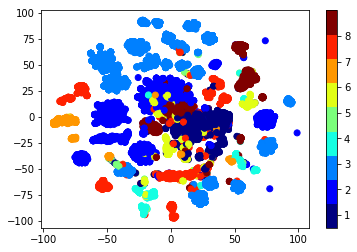

In [169]:
xtsne=TSNE(perplexity=40)
results=xtsne.fit_transform(result_x1)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.5.3. Train and Test split</h3>

In [22]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x1, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.5.4. Random Forest Classifier on final features</h3>


log_loss for c =  100 is 0.13695599315847334
log_loss for c =  500 is 0.12353935821402189
log_loss for c =  1000 is 0.12327829881228887
log_loss for c =  2000 is 0.12250893612202535
log_loss for c =  3000 is 0.12240442119850038


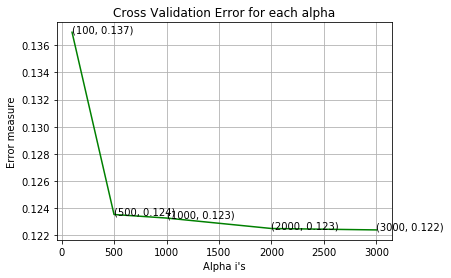

For values of best alpha =  3000 The train log loss is: 0.03212676791938528
For values of best alpha =  3000 The cross validation log loss is: 0.12240442119850038
For values of best alpha =  3000 The test log loss is: 0.13841827165125287


In [32]:
alpha=[100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in tq.tqdm(alpha):
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

Number of misclassified points  3.219871205151794
-------------------------------------------------- Confusion matrix --------------------------------------------------


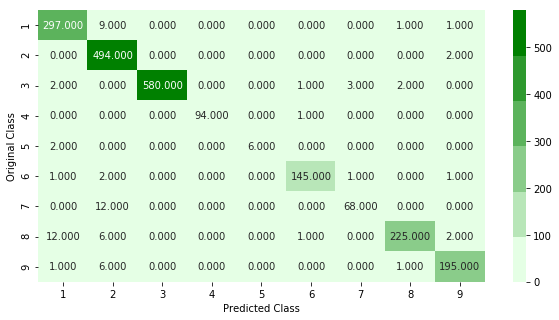

-------------------------------------------------- Precision matrix --------------------------------------------------


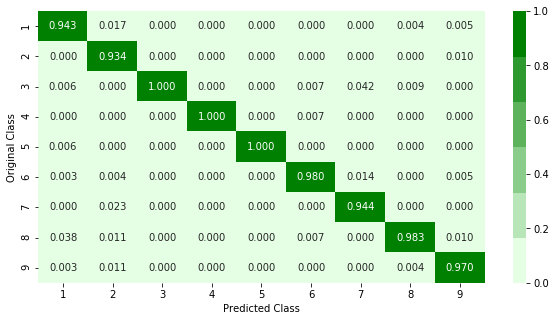

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


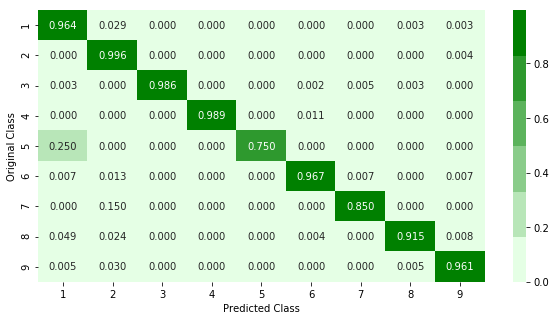

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [45]:
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test_merge))

<h3> 4.5.5. XgBoost Classifier on final features</h3>

<h3> Preparing data for XgBoost Classifier </h3>

In [51]:
xm = r_cfl.feature_importances_
m_idx = np.argsort(xm)[-800:] #Indices of the top 800 features

In [52]:
X_train11_merge = X_train_merge[:,[i for i in m_idx]]
X_test11_merge = X_test_merge[:,[i for i in m_idx]]
X_cv11_merge = X_cv_merge[:,[i for i in m_idx]]

In [53]:
print(X_train11_merge.shape)
print(X_test11_merge.shape)
print(X_cv11_merge.shape)

(6955, 800)
(2174, 800)
(1739, 800)


<h3> 4.5.5. XgBoost Classifier on final features with best hyper parameters using Random search</h3>

In [37]:
x_cfl=XGBClassifier()

prams={
    'learning_rate':[0.05,0.1,0.15,0.2],
     'n_estimators':[500,1000,2000],
     'max_depth':[3,5,7],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,cv=3, verbose=10,n_jobs=-1,)
random_cfl.fit(X_train11_merge, y_train_merge)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed: 19.4min remaining: 11.2min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed: 24.2min remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed: 26.8min remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 36.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [38]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500, 'colsample_bytree': 0.1}


For values of best alpha =  500 The train log loss is: 0.011336687573256007
For values of best alpha =  500 The cross validation log loss is: 0.022448315899245598
For values of best alpha =  500 The test log loss is: 0.01872563906636016
Number of misclassified points  0.18399264029438822
-------------------------------------------------- Confusion matrix --------------------------------------------------


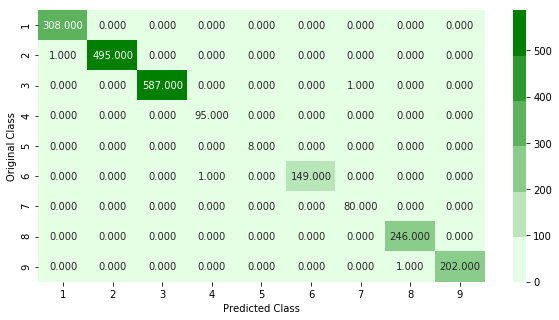

-------------------------------------------------- Precision matrix --------------------------------------------------


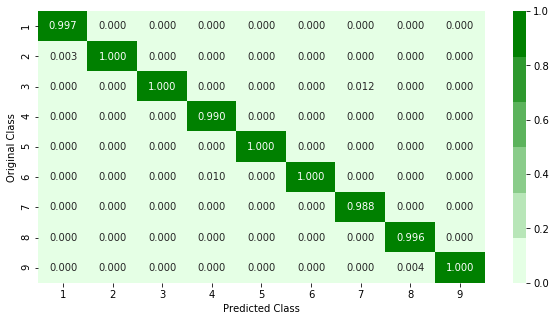

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


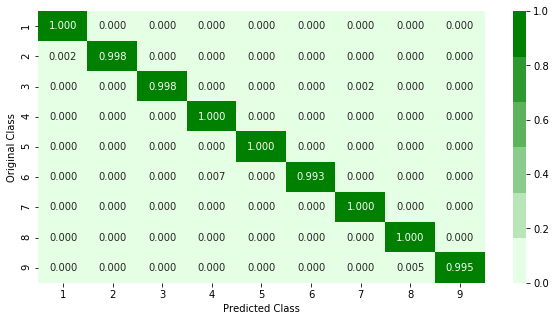

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [54]:
x_cfl=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.2,colsample_bytree=0.1,subsample=0.5,nthread=-1)
x_cfl.fit(X_train11_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train11_merge, y_train_merge)

n_estimators = 500
predict_y = sig_clf.predict_proba(X_train11_merge)
print ('For values of best alpha = ', n_estimators, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv11_merge)
print('For values of best alpha = ', n_estimators, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test11_merge)
print('For values of best alpha = ', n_estimators, "The test log loss is:",log_loss(y_test_merge, predict_y))
plot_confusion_matrix(y_test_merge,sig_clf.predict(X_test11_merge))

<h1> Final Conclusion: </h1>

In [58]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Data", "Model", "Log-Loss", "Misclassification Rate"]

x.add_row(["Byte Files", 'KNN', 0.3267, 7.727])
x.add_row(["Byte Files", 'Logistic Regression', 0.8877, 25.483])
x.add_row(["Byte Files", 'Random Forest', 0.1887, 4.4618])
x.add_row(["Byte Files", 'GBDT', 0.1014, 2.2539])
x.add_row(["Asm Files", 'KNN', 0.1218, 2.0239])
x.add_row(["Asm Files", 'Logistic Regression', 1.1462, 30.6347])
x.add_row(["Asm Files", 'Random Forest', 0.0352, 0.5519])
x.add_row(["Asm Files", 'GBDT', 0.0311, 3.2198])
x.add_row(["Merged", 'Random Forest', 0.1384, 3.2198])
x.add_row(["Merged", 'GBDT', 0.0187, 0.1839])

print(x)

+------------+---------------------+----------+------------------------+
|    Data    |        Model        | Log-Loss | Misclassification Rate |
+------------+---------------------+----------+------------------------+
| Byte Files |         KNN         |  0.3267  |         7.727          |
| Byte Files | Logistic Regression |  0.8877  |         25.483         |
| Byte Files |    Random Forest    |  0.1887  |         4.4618         |
| Byte Files |         GBDT        |  0.1014  |         2.2539         |
| Asm Files  |         KNN         |  0.1218  |         2.0239         |
| Asm Files  | Logistic Regression |  1.1462  |        30.6347         |
| Asm Files  |    Random Forest    |  0.0352  |         0.5519         |
| Asm Files  |         GBDT        |  0.0311  |         3.2198         |
|   Merged   |    Random Forest    |  0.1384  |         3.2198         |
|   Merged   |         GBDT        |  0.0187  |         0.1839         |
+------------+---------------------+----------+----

1. For Microsoft Malware detection, we have been given a data which has two types of files i.e Byte and Asm files. 

2. The Data is real data from Microsoft and is very large.

3. This is a Multi-Class Classification task and there is a total of 9 classes.

4. Firstly, both the Byte and Asm files were separated into two different folders and then EDA, feature engineering and modelling were done separately on both the type of files.

5. For the Byte Files:
    
    a. BOW was used with uni-grams and bi-grams into consideration. Along with the BOW, the size of the files were also taken    as features.
    
    b. The calculation of bi-grams was very much computationally heavy so it was divided into chunks of 1000 datapoints to speed up the process.
    
    c. After combining all the features of Byte files, the data size was (10868,66032). The data was normalized using l1 regularization to create sparsity.
    
    d. Since the dimention was extremely large and there were computational constraints, PCA was used to reduced the dimentions to 5000 for better computation.
    
    e. KNN, Logistic Regression, Random Forest and GBDT were used to train the models. Since, XgBoost suffers from the'Curse of Dimentionality', the dimention was furthur reduced to 500 with the help of feature importances obtained from Random Forest. The winning team of this Kaggle problem had actually taken a similar step in which they had used fit_transform of Random Forest Classifier to reduce the dimentions for XgBoost but, unfortunately the latest version of sklearn donot support fit_transform method for Random Forrest Classifier.

6. For ASM Files:
    
    a. Image Based Features have been used for ASM files. Basically the image based features were opened in binary mode to get a image representation from where only the first 800 pixels were used as it is most useful determined by cross validation.
    
    b. The Image based features were combined with bow of contents of the Asm files and the size of the Asm files.
    
    c. After merging all the features the shape of the data was(10868,849). The data was normalized using l1 regularization to create sparsity.
    
    d. KNN, Logistic Regression, Random Forest and GBDT were used to train the models.

7. For the Final Modelling all the Byte Features and Asm features were combined and the data obtained was of size (10868,668881). The data was normalized using 

8. The dimentionality was too high and to avoid 'Curse of Dimentionality' PCA was again used reducing the dimention to 6000 most important features.

9. After this Random Forest Classifier was used.

10. Using the feature importances obtained from Random Forest, the dimention was furthur reduced to 600 for GBDT as XgBoost suffers with high dimention.

11. From all the above tests, we can clearly say that Logistic Regression has badly suffered with this classification problem and was unable to perform good. Apart from that GBDT was the best with the least test log-loss, Random Forest was very close to GBDT even a simple KNN model did significantly well.



NOTE: Due to computational constraints, the dimentions were reduced for modelling. Using the original dimention along with hyper-parameter tuning with more number of hyper-parameters would reduce the log-loss further more. 